# lead case study
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
people fill up a form providing their email address or phone number, they are classified to be a lead.
now we have to find whether these leads converted or not.

# step 1: importing and cleaning data


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
lead=pd.read_csv("/home/surekha/Desktop/logistic regression/Leads.csv")
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
lead.shape

(9240, 37)

In [5]:
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
lead.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
lead=lead.dropna()

In [9]:
lead.shape

(1943, 37)

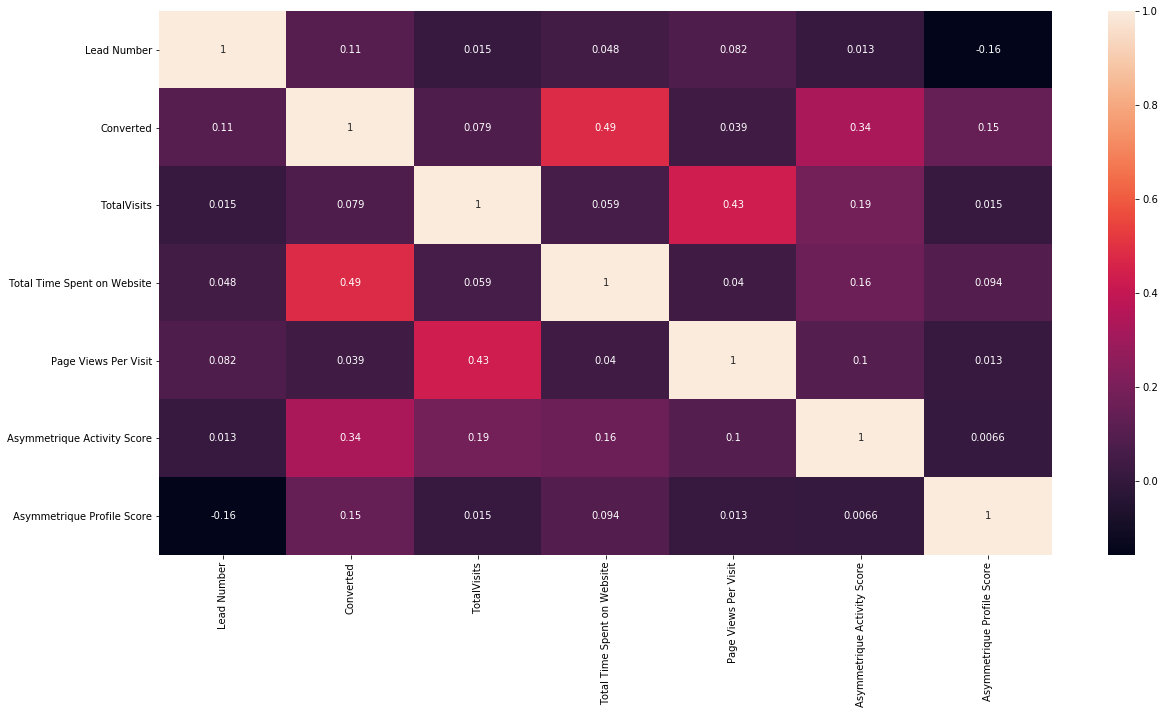

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))        
sns.heatmap(lead.corr(),annot = True)
plt.show()

# step 2: preparing data

In [10]:
varlist = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({"yes":1,"No":0})
lead[varlist] = lead[varlist].apply(binary_map)

In [11]:
le_d=pd.get_dummies(lead[['Last Activity','Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity','Lead Origin']],drop_first=True)
lead=pd.concat([lead,le_d],axis=1)


In [12]:
lead.head()

Prospect ID  Lead Number  \
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3   0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   

                Lead Origin     Lead Source  Do Not Email  Do Not Call  \
2   Landing Page Submission  Direct Traffic           0.0          0.0   
3   Landing Page Submission  Direct Traffic           0.0          0.0   
4   Landing Page Submission          Google           0.0          0.0   
6   Landing Page Submission          Google           0.0          0.0   
10  Landing Page Submission  Organic Search           0.0          0.0   

    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
2           1          2.0                         1532                   2.0   
3           0          1.0                          305                   1.0   
4           1          2.0                         1428                   1.0   
6           1          2.0                         1640                   2.0   
10          1          8.0                         1351                   8.0   

    ... Last Notable Activity_Email Received  \
2   ...                                    0   
3   ...                                    0   
4   ...                                    0   
6   ...                                    0   
10  ...                                    0   

   Last Notable Activity_Had a Phone Conversation  \
2                                               0   
3                                               0   
4                                               0   
6                                               0   
10                                              0   

   Last Notable Activity_Modified  \
2                               0   
3                               1   
4                               1   
6                               1   
10                              0   

   Last Notable Activity_Olark Chat Conversation  \
2                                              0   
3                                              0   
4                                              0   
6                                              0   
10                                             0   

   Last Notable Activity_Page Visited on Website  \
2                                              0   
3                                              0   
4                                              0   
6                                              0   
10                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   
6                               0                                  0   
10                              0                                  0   

    Last Notable Activity_Unsubscribed  Lead Origin_Landing Page Submission  \
2                                    0                                    1   
3                                    0                                    1   
4                                    0                                    1   
6                                    0                                    1   
10                                   0                                    1   

    Lead Origin_Lead Add Form  
2                           0  
3                           0  
4                           0  
6                           0  
10                          0  

[5 rows x 183 columns]

In [13]:
lead=lead.drop(['Lead Origin','Last Activity','Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity'],1)
lead.head()

Prospect ID  Lead Number  Do Not Email  \
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727           0.0   
3   0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719           0.0   
4   3256f628-e534-4826-9d63-4a8b88782852       660681           0.0   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673           0.0   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608           0.0   

    Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
2           0.0          1          2.0                         1532   
3           0.0          0          1.0                          305   
4           0.0          1          2.0                         1428   
6           0.0          1          2.0                         1640   
10          0.0          1          8.0                         1351   

    Page Views Per Visit  Search  Magazine  ...  \
2                    2.0     0.0         0  ...   
3                    1.0     0.0         0  ...   
4                    1.0     0.0         0  ...   
6                    2.0     0.0         0  ...   
10                   8.0     0.0         0  ...   

    Last Notable Activity_Email Received  \
2                                      0   
3                                      0   
4                                      0   
6                                      0   
10                                     0   

    Last Notable Activity_Had a Phone Conversation  \
2                                                0   
3                                                0   
4                                                0   
6                                                0   
10                                               0   

    Last Notable Activity_Modified  \
2                                0   
3                                1   
4                                1   
6                                1   
10                               0   

    Last Notable Activity_Olark Chat Conversation  \
2                                               0   
3                                               0   
4                                               0   
6                                               0   
10                                              0   

    Last Notable Activity_Page Visited on Website  \
2                                               0   
3                                               0   
4                                               0   
6                                               0   
10                                              0   

    Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   
6                                0                                  0   
10                               0                                  0   

    Last Notable Activity_Unsubscribed  Lead Origin_Landing Page Submission  \
2                                    0                                    1   
3                                    0                                    1   
4                                    0                                    1   
6                                    0                                    1   
10                                   0                                    1   

    Lead Origin_Lead Add Form  
2                           0  
3                           0  
4                           0  
6                           0  
10                          0  

[5 rows x 168 columns]

In [14]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 2 to 9239
Columns: 168 entries, Prospect ID to Lead Origin_Lead Add Form
dtypes: float64(11), int64(10), object(1), uint8(146)
memory usage: 626.2+ KB


In [15]:
num_lead=lead[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']]
num_lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Lead Number  TotalVisits  Total Time Spent on Website  \
count    1943.000000  1943.000000                  1943.000000   
mean   619510.328358     4.759650                   731.020072   
std     29440.943939     3.719071                   560.086966   
min    579533.000000     0.000000                     0.000000   
25%    588359.000000     2.000000                   213.000000   
50%    633912.000000     4.000000                   640.000000   
75%    645768.000000     6.000000                  1210.500000   
90%    654905.200000     9.000000                  1527.200000   
95%    657873.400000    11.000000                  1673.500000   
99%    660368.540000    19.580000                  1878.060000   
max    660727.000000    43.000000                  2253.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           1943.000000                  1943.000000   
mean               3.198451                    14.135358   
std                1.862994                     1.255554   
min                0.000000                     8.000000   
25%                2.000000                    14.000000   
50%                3.000000                    14.000000   
75%                4.000000                    15.000000   
90%                5.000000                    16.000000   
95%                7.000000                    16.000000   
99%               10.000000                    17.000000   
max               15.000000                    18.000000   

       Asymmetrique Profile Score  
count                 1943.000000  
mean                    16.990736  
std                      1.901790  
min                     12.000000  
25%                     15.000000  
50%                     17.000000  
75%                     18.000000  
90%                     20.000000  
95%                     20.000000  
99%                     20.000000  
max                     20.000000

In [16]:
lead.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Do Not Email                                      153
Do Not Call                                         1
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Search                                              3
Magazine                                            0
Newspaper Article                                   1
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               1
Through Recommendations                             3
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Asymmetrique Activity Score 

In [17]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                        0.00
Lead Number                                        0.00
Do Not Email                                       7.87
Do Not Call                                        0.05
Converted                                          0.00
TotalVisits                                        0.00
Total Time Spent on Website                        0.00
Page Views Per Visit                               0.00
Search                                             0.15
Magazine                                           0.00
Newspaper Article                                  0.05
X Education Forums                                 0.00
Newspaper                                          0.00
Digital Advertisement                              0.05
Through Recommendations                            0.15
Receive More Updates About Our Courses             0.00
Update me on Supply Chain Content                  0.00
Get updates on DM Content                       

In [18]:
lead=lead.dropna()

In [19]:
lead.isna().sum()

Prospect ID                                       0
Lead Number                                       0
Do Not Email                                      0
Do Not Call                                       0
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Search                                            0
Magazine                                          0
Newspaper Article                                 0
X Education Forums                                0
Newspaper                                         0
Digital Advertisement                             0
Through Recommendations                           0
Receive More Updates About Our Courses            0
Update me on Supply Chain Content                 0
Get updates on DM Content                         0
Asymmetrique Activity Score                       0
Asymmetrique

# step 3: testing and training data splitting

In [20]:
from sklearn.model_selection import train_test_split
X= lead.drop(['Prospect ID','Converted','Lead Number'],axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3            0.0          0.0          1.0                          305   
4            0.0          0.0          2.0                         1428   
6            0.0          0.0          2.0                         1640   
12           0.0          0.0         11.0                         1538   
15           0.0          0.0          6.0                         1012   

    Page Views Per Visit  Search  Magazine  Newspaper Article  \
3                    1.0     0.0         0                0.0   
4                    1.0     0.0         0                0.0   
6                    2.0     0.0         0                0.0   
12                  11.0     0.0         0                0.0   
15                   6.0     0.0         0                0.0   

    X Education Forums  Newspaper  ...  Last Notable Activity_Email Received  \
3                    0          0  ...                                     0   
4                    0          0  ...                                     0   
6                    0          0  ...                                     0   
12                   0          0  ...                                     0   
15                   0          0  ...                                     0   

    Last Notable Activity_Had a Phone Conversation  \
3                                                0   
4                                                0   
6                                                0   
12                                               0   
15                                               0   

    Last Notable Activity_Modified  \
3                                1   
4                                1   
6                                1   
12                               1   
15                               0   

    Last Notable Activity_Olark Chat Conversation  \
3                                               0   
4                                               0   
6                                               0   
12                                              0   
15                                              0   

    Last Notable Activity_Page Visited on Website  \
3                                               0   
4                                               0   
6                                               0   
12                                              0   
15                                              0   

    Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3                                0                                  0   
4                                0                                  0   
6                                0                                  0   
12                               0                                  0   
15                               0                                  0   

    Last Notable Activity_Unsubscribed  Lead Origin_Landing Page Submission  \
3                                    0                                    1   
4                                    0                                    1   
6                                    0                                    1   
12                                   0                                    0   
15                                   0                                    0   

    Lead Origin_Lead Add Form  
3                           0  
4                           0  
6                           0  
12                          0  
15                          0  

[5 rows x 165 columns]

In [21]:
Y=lead['Converted']
Y.head()

3     0
4     1
6     1
12    1
15    1
Name: Converted, dtype: int64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [25]:
len(X_train.columns)

165

# step 4: scaling

In [26]:
from sklearn.preprocessing  import MinMaxScaler


In [27]:
scaler =MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1189           0.0          0.0     0.095238                     0.662228   
945            0.0          0.0     0.047619                     0.184199   
1576           0.0          0.0     0.119048                     0.522858   
8330           0.0          0.0     0.071429                     0.435419   
438            0.0          0.0     0.190476                     0.651576   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
1189              0.307692     0.0         0                0.0   
945               0.153846     0.0         0                0.0   
1576              0.153846     0.0         0                0.0   
8330              0.076923     0.0         0                0.0   
438               0.615385     0.0         0                0.0   

      X Education Forums  Newspaper  ...  \
1189                   0          0  ...   
945                    0          0  ...   
1576                   0          0  ...   
8330                   0          0  ...   
438                    0          0  ...   

      Last Notable Activity_Email Received  \
1189                                     0   
945                                      0   
1576                                     0   
8330                                     0   
438                                      0   

      Last Notable Activity_Had a Phone Conversation  \
1189                                               0   
945                                                0   
1576                                               0   
8330                                               0   
438                                                0   

      Last Notable Activity_Modified  \
1189                               1   
945                                1   
1576                               0   
8330                               1   
438                                1   

      Last Notable Activity_Olark Chat Conversation  \
1189                                              0   
945                                               0   
1576                                              0   
8330                                              0   
438                                               0   

      Last Notable Activity_Page Visited on Website  \
1189                                              0   
945                                               0   
1576                                              0   
8330                                              0   
438                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1189                               0                                  0   
945                                0                                  0   
1576                               0                                  0   
8330                               0                                  0   
438                                0                                  0   

      Last Notable Activity_Unsubscribed  Lead Origin_Landing Page Submission  \
1189                                   0                                    1   
945                                    0                                    0   
1576                                   0                                    0   
8330                                   0                                    1   
438                                    0                                    1   

      Lead Origin_Lead Add Form  
1189                          0  
945                           0  
1576                          0  
8330                          0  
438                           0  

[5 rows x 165 columns]

In [28]:
Converted=(sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

59.240759240759246

In [29]:
len(X_train.columns)

165

In [30]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LogisticRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train)                  

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:  2.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.722166      0.022155         0.001949        0.000055   
1        0.697617      0.017754         0.001939        0.000034   
2        0.692365      0.007463         0.001967        0.000060   
3        0.698849      0.014437         0.001962        0.000023   
4        0.696989      0.011151         0.001971        0.000081   
5        0.704569      0.017133         0.001992        0.000052   
6        0.721953      0.033225         0.002029        0.000167   
7        0.721299      0.026143         0.002074        0.000120   
8        0.782858      0.036884         0.002155        0.000337   
9        0.766992      0.028805         0.002218        0.000367   
10       0.760686      0.050831         0.002035        0.000163   
11       0.709809      0.033948         0.002006        0.000113   
12       0.730792      0.035238         0.002045        0.000146   
13       0.671234      0.014433         0.001969        0.000044   
14       0.663900      0.010230         0.001990        0.000099   
15       0.663045      0.007813         0.001965        0.000040   
16       0.663285      0.012532         0.001981        0.000020   
17       0.660072      0.013297         0.002067        0.000068   
18       0.655516      0.005590         0.002249        0.000587   
19       0.652929      0.004061         0.002050        0.000056   
20       0.666238      0.035520         0.002060        0.000090   
21       0.651222      0.009564         0.002016        0.000039   
22       0.643567      0.011752         0.001988        0.000026   
23       0.640484      0.009862         0.001982        0.000033   
24       0.640854      0.008128         0.002048        0.000048   
25       0.634147      0.007487         0.002053        0.000021   
26       0.645589      0.018410         0.002076        0.000102   
27       0.637455      0.010054         0.002080        0.000078   
28       0.626103      0.007350         0.002021        0.000045   
29       0.628184      0.010210         0.002129        0.000122   
30       0.629526      0.014664         0.002047        0.000095   
31       0.625156      0.012554         0.002039        0.000040   
32       0.619790      0.013263         0.002078        0.000027   
33       0.615465      0.012442         0.002118        0.000111   
34       0.610032      0.006506         0.002048        0.000054   
35       0.645329      0.022909         0.002031        0.000074   
36       0.646382      0.022980         0.002382        0.000638   
37       0.652499      0.020154         0.002080        0.000081   

   param_n_features_to_select                        params  \
0                           2   {'n_features_to_select': 2}   
1                           3   {'n_features_to_select': 3}   
2                           4   {'n_features_to_select': 4}   
3                           5   {'n_features_to_select': 5}   
4                           6   {'n_features_to_select': 6}   
5                           7   {'n_features_to_select': 7}   
6                           8   {'n_features_to_select': 8}   
7                           9   {'n_features_to_select': 9}   
8                          10  {'n_features_to_select': 10}   
9                          11  {'n_features_to_select': 11}   
10                         12  {'n_features_to_select': 12}   
11                         13  {'n_features_to_select': 13}   
12                         14  {'n_features_to_select': 14}   
13                         15  {'n_features_to_select': 15}   
14                         16  {'n_features_to_select': 16}   
15                         17  {'n_features_to_select': 17}   
16                         18  {'n_features_to_select': 18}   
17                         19  {'n_features_to_select': 19}   
18                         20  {'n_features_to_select': 20}   
19                         21  {'n_features_to_select': 21}   
20                         2

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns
import re
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')


In [33]:
n_features_optimal = 10

lm = LogisticRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train,Y_train)

# predict prices of X_test
Y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2)

-0.6629834254143647


# step 5: correlation

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

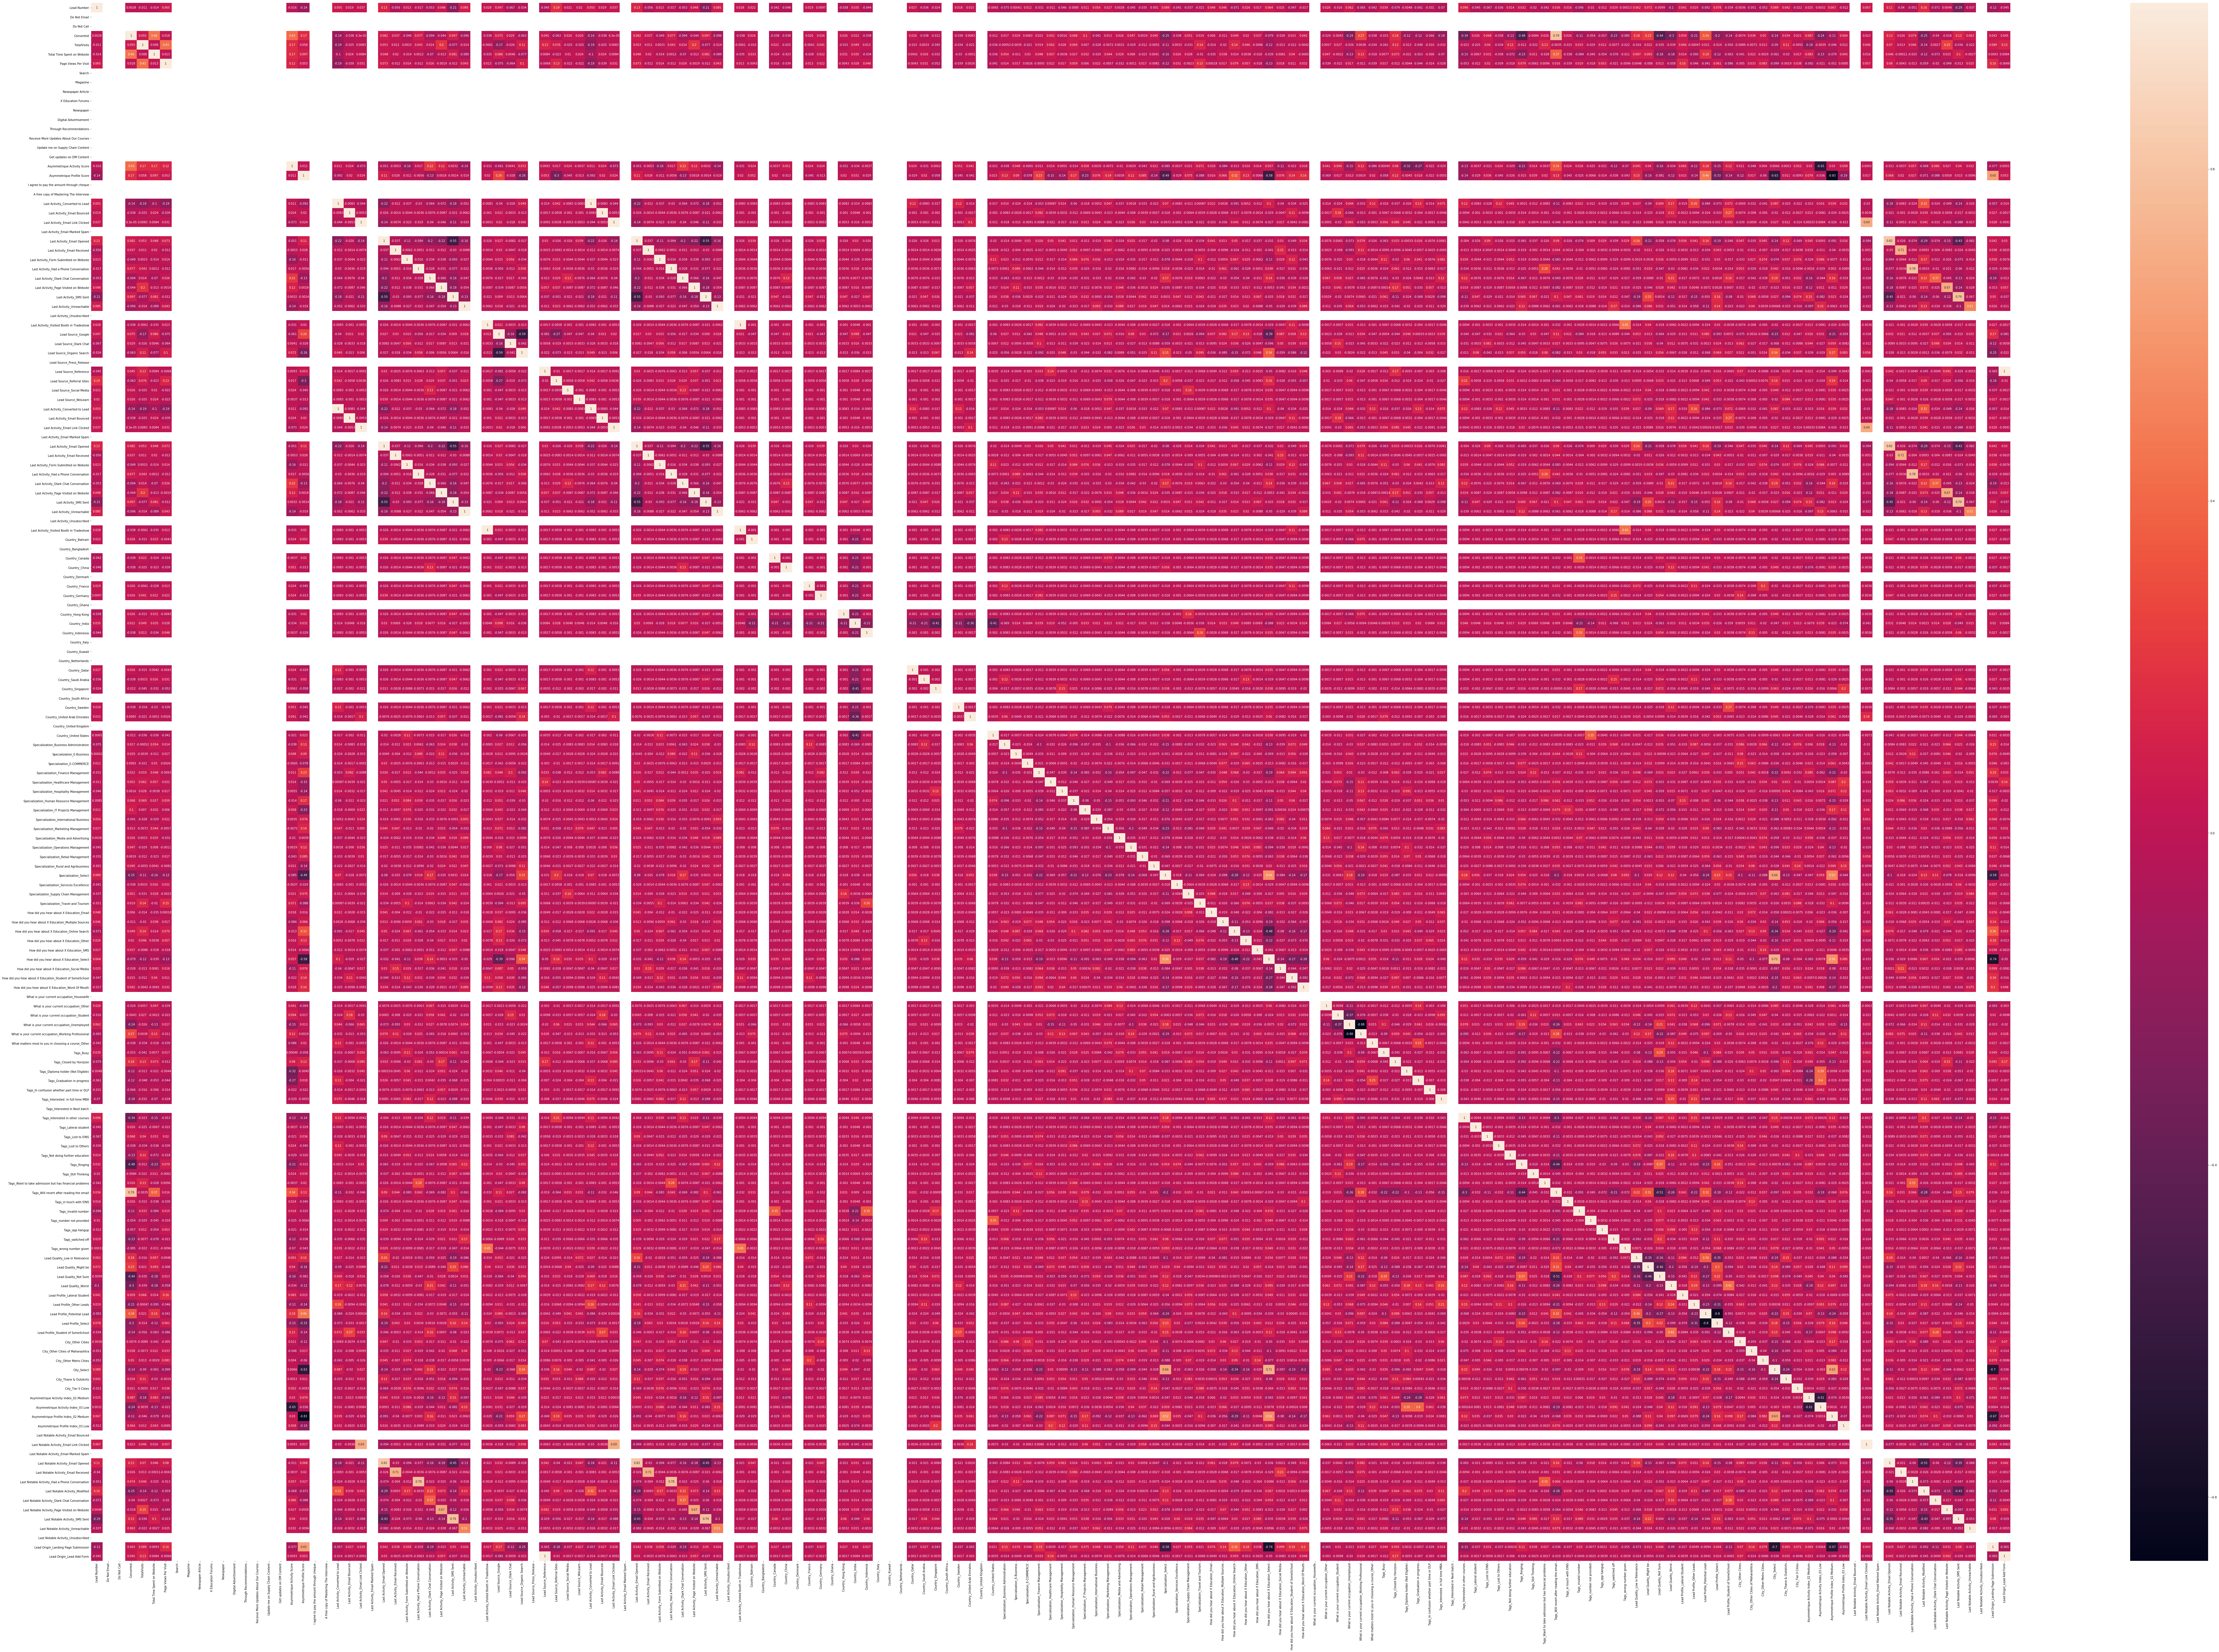

In [35]:
plt.figure(figsize = (150,100))        
sns.heatmap(lead.corr(),annot = True)
plt.show()

# step 6: model building

In [36]:
import statsmodels.api as sm

In [37]:
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  700
Model:                            GLM   Df Residuals:                      588
Model Family:                Binomial   Df Model:                          111
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 May 2020   Deviance:                          nan
Time:                        12:16:55   Pearson chi2:                 1.08e+17
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                    -1.166e+15   8.74e+07  -1.33e+07      0.000   -1.17e+15   -1.17e+15
Do Not Email                                                 8.6532   4.41e-07   1.96e+07      0.000       8.653       8.653
Do Not Call                                                  7.7326   1.07e-07   7.25e+07      0.000       7.733       7.733
TotalVisits                                              -6.775e+14   4.19e+07  -1.62e+07      0.000   -6.78e+14   -6.78e+14
Total Time Spent on Website                               4.482e+14   1.26e+07   3.55e+07      0.000    4.48e+14    4.48e+14
Page Views Per Visit                                     -2.076e+15   2.32e+07  -8.94e+07      0.000   -2.08e+15   -2.08e+15
Search                                                     -13.2186   2.08e-07  -6.35e+07      0.000     -13.219     -13.219
Magazine                                                     2.2482   3.74e-07   6.02e+06      0.000       2.248       2.248
Newspaper Article                                           17.0159   4.21e-07   4.04e+07      0.000      17.016      17.016
X Education Forums                                          -0.0913   4.38e-07  -2.08e+05      0.000      -0.091      -0.091
Newspaper                                                   -2.0206   4.02e-07  -5.03e+06      0.000      -2.021      -2.021
Digital Advertisement                                       -3.6699   1.15e-07  -3.19e+07      0.000      -3.670      -3.670
Through Recommendations                                      9.8101   3.38e-07    2.9e+07      0.000       9.810       9.810
Receive More Updates About Our Courses                     -16.3635   1.86e-07  -8.79e+07      0.000     -16.363     -16.363
Update me on Supply Chain Content                           -1.6172   1.44e-07  -1.13e+07      0.000      -1.617      -1.617
Get updates on DM Content                                   12.2632   3.26e-07   3.76e+07      0.000      12.263      12.263
Asymmetrique Activity Score                               9.101e+15   4.23e+07   2.15e+08      0.000     9.1e+15     9.1e+15
Asymmetrique Profile Score                               -5.016e+15    6.4e+07  -7.84e+07      0.000   -5.02e+15   -5.02e+15
I agree to pay the amount through cheque                     9.8572   3.46e-07   2.85e+07      0.000       9.857       9.857
A free copy of Mastering The Interview                       1.1047   1.39e-07   7.94e+06      0.000       1.105       1.105
Last Activity_Converted to Lead                           4.251e+13   1.07e+07   3.97e+06      0.000    4.25e+13    4.25e+13
Last Activity_Email Bounced                               2.837e+14    3.6e+07   7.87e+06      0.000    2.84e+14    2.84e+14
Last Activity_Email Link Clicked     

# Step 7:Feature Selection Using RFE

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [39]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, Y_train)

In [40]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
        True, False,  True, False,  True,  True, False, False,  True,
       False, False,

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 151),
 ('Do Not Call', False, 150),
 ('TotalVisits', False, 110),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Search', False, 119),
 ('Magazine', False, 118),
 ('Newspaper Article', False, 116),
 ('X Education Forums', False, 114),
 ('Newspaper', False, 113),
 ('Digital Advertisement', False, 126),
 ('Through Recommendations', False, 128),
 ('Receive More Updates About Our Courses', False, 129),
 ('Update me on Supply Chain Content', False, 127),
 ('Get updates on DM Content', False, 136),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 25),
 ('I agree to pay the amount through cheque', False, 134),
 ('A free copy of Mastering The Interview', False, 130),
 ('Last Activity_Converted to Lead', False, 12),
 ('Last Activity_Email Bounced', False, 78),
 ('Last Activity_Email Link Clicked', False, 52),
 ('Last Activity_Email Marked Spam', False, 120),
 ('Last Activity_Email Opened', False, 33),

In [42]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form'],
      dtype='object', length=150)

In [43]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  700
Model:                            GLM   Df Residuals:                      684
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78.972
Date:                Mon, 11 May 2020   Deviance:                       157.94
Time:                        12:16:56   Pearson chi2:                 1.06e+03
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -8.0605      1.847     -4.365      0.000     -11.680      -4.441
Total Time Spent on Website                  3.6563      0.981      3.728      0.000       1.734       5.578
Asymmetrique Activity Score                  9.4215      2.572      3.664      0.000       4.381      14.462
Specialization_Select                       -0.6075      0.525     -1.157      0.247      -1.637       0.422
Tags_Busy                                    1.7203      0.751      2.292      0.022       0.249       3.192
Tags_Closed by Horizzon                     26.8047   3.48e+04      0.001      0.999   -6.81e+04    6.82e+04
Tags_Interested  in full time MBA          -23.0641   4.64e+04     -0.000      1.000   -9.09e+04    9.09e+04
Tags_Interested in other courses           -22.7689   2.62e+04     -0.001      0.999   -5.14e+04    5.13e+04
Tags_Lost to EINS                            4.1811      1.725      2.424      0.015       0.800       7.562
Tags_Not doing further education           -22.7704   5.33e+04     -0.000      1.000   -1.04e+05    1.04e+05
Tags_Ringing                                -1.0940      0.793     -1.379      0.168      -2.649       0.461
Tags_Will revert after reading the email     5.2737      0.720      7.321      0.000       3.862       6.686
Tags_switched off                           -1.6383      1.214     -1.349      0.177      -4.018       0.742
Lead Quality_Worst                         -23.3066   2.55e+04     -0.001      0.999   -5.01e+04       5e+04
City_Other Cities of Maharashtra             1.9163      0.894      2.144      0.032       0.165       3.668
Asymmetrique Activity Index_03.Low           1.1583      1.285      0.902      0.367      -1.360       3.676
============================================================================================================
"""

In [44]:
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

1189    7.884009e-01
945     1.347189e-02
1576    7.889693e-02
8330    1.000000e+00
438     9.990165e-01
2092    1.872491e-01
424     2.152461e-11
2365    1.217183e-22
1423    9.729669e-01
2246    9.991473e-01
dtype: float64

In [45]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([7.88400915e-01, 1.34718912e-02, 7.88969297e-02, 1.00000000e+00,
       9.99016489e-01, 1.87249133e-01, 2.15246142e-11, 1.21718338e-22,
       9.72966891e-01, 9.99147266e-01])

In [46]:
Y_train_pred_final=pd.DataFrame({'lead':Y_train.values,'lead_prob':Y_train_pred})
Y_train_pred_final['Prospect ID']=Y_train.index
Y_train_pred_final.head()

lead  lead_prob  Prospect ID
0     1   0.788401         1189
1     0   0.013472          945
2     0   0.078897         1576
3     1   1.000000         8330
4     1   0.999016          438

In [47]:
Y_train_pred_final['predicted'] = Y_train_pred_final.lead_prob.map(lambda x: 1 if x > 0.5 else 0)

In [48]:
Y_train_pred_final.head()

lead  lead_prob  Prospect ID  predicted
0     1   0.788401         1189          1
1     0   0.013472          945          0
2     0   0.078897         1576          0
3     1   1.000000         8330          1
4     1   0.999016          438          1

In [49]:
from sklearn import metrics

In [50]:
confusion = metrics.confusion_matrix(Y_train_pred_final.lead, Y_train_pred_final.predicted )
print(confusion)

[[277  11]
 [ 14 398]]


In [51]:
print(metrics.accuracy_score(Y_train_pred_final.lead, Y_train_pred_final.predicted))

0.9642857142857143


checking vifs

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                Asymmetrique Activity Score  13.36
10  Tags_Will revert after reading the email   8.69
0                Total Time Spent on Website   3.56
9                               Tags_Ringing   2.52
4                    Tags_Closed by Horizzon   1.71
6           Tags_Interested in other courses   1.70
3                                  Tags_Busy   1.58
12                        Lead Quality_Worst   1.58
2                      Specialization_Select   1.45
11                         Tags_switched off   1.42
5          Tags_Interested  in full time MBA   1.20
8           Tags_Not doing further education   1.15
14        Asymmetrique Activity Index_03.Low   1.15
7                          Tags_Lost to EINS   1.14
13          City_Other Cities of Maharashtra   1.10

In [54]:
col = col.drop('Asymmetrique Activity Score', 1)
col

Index(['Total Time Spent on Website', 'Specialization_Select', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'City_Other Cities of Maharashtra',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                  700
Model:                            GLM   Df Residuals:                      685
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -86.467
Date:                Mon, 11 May 2020   Deviance:                       172.93
Time:                        12:16:57   Pearson chi2:                 1.13e+03
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0130      0.619     -3.253      0.001      -3.226      -0.800
Total Time Spent on Website                  3.5060      0.949      3.696      0.000       1.647       5.365
Specialization_Select                       -0.6846      0.512     -1.337      0.181      -1.688       0.319
Tags_Busy                                    1.2840      0.694      1.850      0.064      -0.076       2.644
Tags_Closed by Horizzon                     26.1819   3.71e+04      0.001      0.999   -7.27e+04    7.28e+04
Tags_Interested  in full time MBA          -23.9095   4.66e+04     -0.001      1.000   -9.13e+04    9.13e+04
Tags_Interested in other courses           -23.6573   2.67e+04     -0.001      0.999   -5.23e+04    5.23e+04
Tags_Lost to EINS                            3.3009      1.538      2.146      0.032       0.286       6.316
Tags_Not doing further education           -23.2993   5.38e+04     -0.000      1.000   -1.05e+05    1.05e+05
Tags_Ringing                                -1.8475      0.738     -2.502      0.012      -3.295      -0.400
Tags_Will revert after reading the email     4.7838      0.630      7.589      0.000       3.548       6.019
Tags_switched off                           -2.3299      1.182     -1.972      0.049      -4.646      -0.014
Lead Quality_Worst                         -22.9442    2.6e+04     -0.001      0.999   -5.09e+04    5.09e+04
City_Other Cities of Maharashtra             1.6623      0.802      2.073      0.038       0.090       3.234
Asymmetrique Activity Index_03.Low          -2.5119      0.861     -2.917      0.004      -4.200      -0.824
============================================================================================================
"""

In [56]:
Y_train_pred = res.predict(X_train_sm).values.reshape(-1)
Y_train_pred[:10]

array([8.31016511e-01, 3.86189734e-02, 3.30410825e-02, 1.00000000e+00,
       9.93664956e-01, 4.81953524e-01, 6.33259249e-12, 4.26159134e-22,
       9.92338820e-01, 9.94471217e-01])

In [57]:
Y_train_pred_final['lead_prob'] = Y_train_pred
Y_train_pred_final['predicted'] = Y_train_pred_final.lead_prob.map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

lead  lead_prob  Prospect ID  predicted
0     1   0.831017         1189          1
1     0   0.038619          945          0
2     0   0.033041         1576          0
3     1   1.000000         8330          1
4     1   0.993665          438          1

In [58]:
print(metrics.accuracy_score(Y_train_pred_final.lead, Y_train_pred_final.predicted))

0.9642857142857143


lets check vifs again

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                Total Time Spent on Website  3.40
9   Tags_Will revert after reading the email  2.96
1                      Specialization_Select  1.39
11                        Lead Quality_Worst  1.26
5           Tags_Interested in other courses  1.20
8                               Tags_Ringing  1.20
3                    Tags_Closed by Horizzon  1.19
2                                  Tags_Busy  1.15
4          Tags_Interested  in full time MBA  1.12
10                         Tags_switched off  1.10
12          City_Other Cities of Maharashtra  1.10
13        Asymmetrique Activity Index_03.Low  1.09
7           Tags_Not doing further education  1.06
6                          Tags_Lost to EINS  1.05

In [60]:
confusion = metrics.confusion_matrix(Y_train_pred_final.lead, Y_train_pred_final.predicted )
print(confusion)

[[277  11]
 [ 14 398]]


In [61]:
confusion = metrics.confusion_matrix(Y_train_pred_final.lead, Y_train_pred_final.predicted )
print(confusion)

[[277  11]
 [ 14 398]]


metrics

In [62]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [63]:
TP/float(TP+FN)

0.9660194174757282

In [64]:
TN / float(TN+FP)

0.9618055555555556

In [65]:
print(FP/ float(TN+FP))

0.03819444444444445


In [66]:
print (TP / float(TP+FP))

0.9731051344743277


In [67]:
print (TN / float(TN+ FN))

0.9518900343642611


In [68]:
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1189           0.0          0.0     0.095238                     0.662228   
945            0.0          0.0     0.047619                     0.184199   
1576           0.0          0.0     0.119048                     0.522858   
8330           0.0          0.0     0.071429                     0.435419   
438            0.0          0.0     0.190476                     0.651576   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
1189              0.307692     0.0         0                0.0   
945               0.153846     0.0         0                0.0   
1576              0.153846     0.0         0                0.0   
8330              0.076923     0.0         0                0.0   
438               0.615385     0.0         0                0.0   

      X Education Forums  Newspaper  ...  \
1189                   0          0  ...   
945                    0          0  ...   
1576                   0          0  ...   
8330                   0          0  ...   
438                    0          0  ...   

      Last Notable Activity_Email Received  \
1189                                     0   
945                                      0   
1576                                     0   
8330                                     0   
438                                      0   

      Last Notable Activity_Had a Phone Conversation  \
1189                                               0   
945                                                0   
1576                                               0   
8330                                               0   
438                                                0   

      Last Notable Activity_Modified  \
1189                               1   
945                                1   
1576                               0   
8330                               1   
438                                1   

      Last Notable Activity_Olark Chat Conversation  \
1189                                              0   
945                                               0   
1576                                              0   
8330                                              0   
438                                               0   

      Last Notable Activity_Page Visited on Website  \
1189                                              0   
945                                               0   
1576                                              0   
8330                                              0   
438                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1189                               0                                  0   
945                                0                                  0   
1576                               0                                  0   
8330                               0                                  0   
438                                0                                  0   

      Last Notable Activity_Unsubscribed  Lead Origin_Landing Page Submission  \
1189                                   0                                    1   
945                                    0                                    0   
1576                                   0                                    0   
8330                                   0                                    1   
438                                    0                                    1   

      Lead Origin_Lead Add Form  
1189                          0  
945                           0  
1576                          0  
8330                          0  
438                           0  

[5 rows x 165 columns]

# step 8: ROC Curve

In [69]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('lead converting characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [70]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.lead, Y_train_pred_final.lead_prob, drop_intermediate = False )

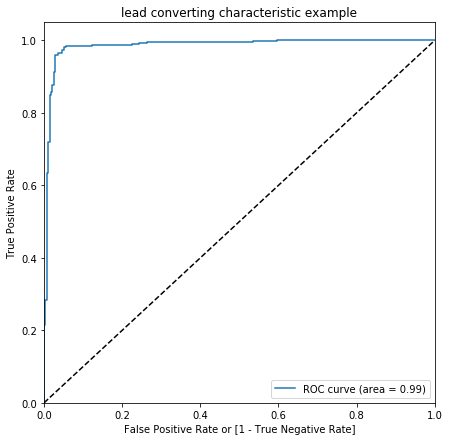

In [71]:
draw_roc(Y_train_pred_final.lead, Y_train_pred_final.lead_prob)

# step 9: Finding Optimal Cut-Off Point

In [72]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.lead_prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

lead  lead_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     1   0.831017         1189          1    1    1    1    1    1    1    1   
1     0   0.038619          945          0    1    0    0    0    0    0    0   
2     0   0.033041         1576          0    1    0    0    0    0    0    0   
3     1   1.000000         8330          1    1    1    1    1    1    1    1   
4     1   0.993665          438          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    1    1    0  
1    0    0    0  
2    0    0    0  
3    1    1    1  
4    1    1    1

In [73]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.lead, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.588571  1.000000  0.000000
0.1   0.1  0.918571  0.987864  0.819444
0.2   0.2  0.952857  0.985437  0.906250
0.3   0.3  0.962857  0.985437  0.930556
0.4   0.4  0.965714  0.973301  0.954861
0.5   0.5  0.964286  0.966019  0.961806
0.6   0.6  0.962857  0.961165  0.965278
0.7   0.7  0.961429  0.953883  0.972222
0.8   0.8  0.957143  0.946602  0.972222
0.9   0.9  0.941429  0.919903  0.972222


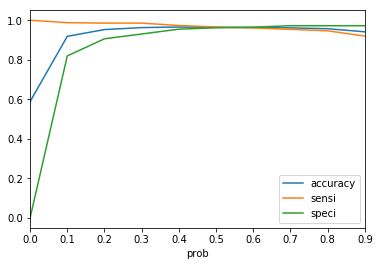

In [74]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

from the above curve 0.6 is the optimum value to take it as cutoff

In [75]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.lead_prob.map( lambda x: 1 if x > 0.3 else 0)
Y_train_pred_final.head()

lead  lead_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     1   0.831017         1189          1    1    1    1    1    1    1    1   
1     0   0.038619          945          0    1    0    0    0    0    0    0   
2     0   0.033041         1576          0    1    0    0    0    0    0    0   
3     1   1.000000         8330          1    1    1    1    1    1    1    1   
4     1   0.993665          438          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    1    1    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    1                1  
4    1    1    1                1

In [76]:
metrics.accuracy_score(Y_train_pred_final.lead, Y_train_pred_final.final_predicted)

0.9628571428571429

In [77]:
confusion2 = metrics.confusion_matrix(Y_train_pred_final.lead, Y_train_pred_final.final_predicted )
confusion2

array([[268,  20],
       [  6, 406]])

In [78]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [79]:
TP / float(TP+FN)

0.9854368932038835

In [80]:
TN / float(TN+FP)

0.9305555555555556

In [81]:
FP/ float(TN+FP)

0.06944444444444445

In [82]:
print (TP / float(TP+FP))

0.9530516431924883


In [83]:
TN / float(TN+ FN)

0.9781021897810219

precission and recall

In [84]:
confusion = metrics.confusion_matrix(Y_train_pred_final.lead, Y_train_pred_final.predicted )
confusion

array([[277,  11],
       [ 14, 398]])

In [85]:
#Precision
#TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9731051344743277

In [86]:
#Recall
#TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9660194174757282

In [87]:
from sklearn.metrics import precision_score, recall_score

In [88]:
?precision_score
precision_score(Y_train_pred_final.lead, Y_train_pred_final.predicted)

0.9731051344743277

In [89]:
recall_score(Y_train_pred_final.lead, Y_train_pred_final.predicted)

0.9660194174757282

# Precision and recall tradeoff

In [90]:
from sklearn.metrics import precision_recall_curve
Y_train_pred_final.lead, Y_train_pred_final.predicted

(0      1
 1      0
 2      0
 3      1
 4      1
 5      0
 6      0
 7      0
 8      1
 9      1
 10     0
 11     0
 12     1
 13     0
 14     1
 15     1
 16     0
 17     0
 18     1
 19     1
 20     0
 21     1
 22     1
 23     1
 24     1
 25     1
 26     0
 27     0
 28     0
 29     1
       ..
 670    1
 671    1
 672    1
 673    1
 674    1
 675    0
 676    1
 677    1
 678    1
 679    0
 680    0
 681    1
 682    0
 683    0
 684    1
 685    0
 686    1
 687    0
 688    0
 689    0
 690    1
 691    1
 692    0
 693    1
 694    0
 695    1
 696    0
 697    1
 698    0
 699    0
 Name: lead, Length: 700, dtype: int64, 0      1
 1      0
 2      0
 3      1
 4      1
 5      0
 6      0
 7      0
 8      1
 9      1
 10     0
 11     0
 12     1
 13     1
 14     1
 15     1
 16     0
 17     0
 18     1
 19     1
 20     0
 21     1
 22     1
 23     0
 24     1
 25     1
 26     0
 27     1
 28     0
 29     1
       ..
 670    1
 671    1
 672    1
 673    1
 

In [91]:
p, r, thresholds = precision_recall_curve(Y_train_pred_final.lead, Y_train_pred_final.lead_prob)

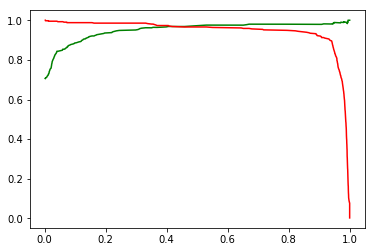

In [92]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 10: Making predictions on the test set


In [93]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Specialization_Select  Tags_Busy  \
1037                          100                      1          0   
1539                           62                      0          0   
2358                          240                      0          0   
1868                          355                      0          0   
2497                         1859                      0          0   

      Tags_Closed by Horizzon  Tags_Interested  in full time MBA  \
1037                        0                                  0   
1539                        0                                  0   
2358                        0                                  0   
1868                        0                                  0   
2497                        0                                  0   

      Tags_Interested in other courses  Tags_Lost to EINS  \
1037                                 1                  0   
1539                                 0                  0   
2358                                 0                  0   
1868                                 0                  0   
2497                                 0                  0   

      Tags_Not doing further education  Tags_Ringing  \
1037                                 0             0   
1539                                 0             0   
2358                                 0             0   
1868                                 0             1   
2497                                 0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
1037                                         0                  0   
1539                                         1                  0   
2358                                         1                  0   
1868                                         0                  0   
2497                                         1                  0   

      Lead Quality_Worst  City_Other Cities of Maharashtra  \
1037                   1                                 0   
1539                   0                                 0   
2358                   0                                 0   
1868                   0                                 0   
2497                   0                                 1   

      Asymmetrique Activity Index_03.Low  
1037                                   0  
1539                                   0  
2358                                   0  
1868                                   0  
2497                                   0

In [94]:
X_test_sm = sm.add_constant(X_test)

In [95]:
Y_test_pred = res.predict(X_test_sm)

In [96]:
Y_test_pred[:10]

1037    1.0
1539    1.0
2358    1.0
1868    1.0
2497    1.0
525     1.0
2182    1.0
2418    1.0
9162    1.0
8904    1.0
dtype: float64

In [97]:
Y_pred_1 = pd.DataFrame(Y_test_pred)

In [98]:
Y_pred_1.head()

0
1037  1.0
1539  1.0
2358  1.0
1868  1.0
2497  1.0

In [99]:
Y_test_df = pd.DataFrame(Y_test)

In [100]:
Y_test_df['Prospect ID'] = Y_test_df.index

In [101]:
Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [102]:
Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)

In [103]:
Y_pred_final.head()

Converted  Prospect ID    0
0          0         1037  1.0
1          1         1539  1.0
2          1         2358  1.0
3          0         1868  1.0
4          1         2497  1.0

In [104]:
Y_pred_final= Y_pred_final.rename(columns={ 0 : 'lead_prob'})

In [105]:
Y_pred_final.head()

Converted  Prospect ID  lead_prob
0          0         1037        1.0
1          1         1539        1.0
2          1         2358        1.0
3          0         1868        1.0
4          1         2497        1.0

In [106]:
Y_pred_final['final_predicted'] = Y_pred_final.lead_prob.map(lambda x: 1 if x > 0.42 else 0)

In [107]:
Y_pred_final.head()

Converted  Prospect ID  lead_prob  final_predicted
0          0         1037        1.0                1
1          1         1539        1.0                1
2          1         2358        1.0                1
3          0         1868        1.0                1
4          1         2497        1.0                1

In [108]:
confusion2 = metrics.confusion_matrix(Y_pred_final.Converted , Y_pred_final.final_predicted )
confusion2

array([[  1, 119],
       [  0, 181]])

In [109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
TP / float(TP+FN)

1.0

In [111]:
TN / float(TN+FP)

0.008333333333333333